In [ ]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Import required libraries

from sklearn.ensemble import GradientBoostingClassifier

# others model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier




In [ ]:
# Load the imbalanced dataset into a Pandas DataFrame
df = pd.read_excel("/content/opium_GI_copy.xlsx")

In [ ]:
df.shape

(6519, 153)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Columns: 153 entries, PID to TARGET_GI
dtypes: float64(10), int64(143)
memory usage: 7.6 MB


In [ ]:
# Separate the target variable from the features
X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1]  # Target variable

In [ ]:
print(df.isnull().sum())


PID                  0
Gender               0
Ethnicity            0
MaritalStatus        0
Education            0
                    ..
FoodWatOthVeg        0
FoodWatOthMeat       0
FoodWatOthFish       0
FoodWatOthSpecify    0
TARGET_GI            0
Length: 153, dtype: int64


In [ ]:
#Handle duplicates
print(df.duplicated().sum())
#df.drop_duplicates(inplace=True)

0


In [ ]:
X

,PID,Gender,Ethnicity,MaritalStatus,Education,Age,BPDBP,BPSBP,BodyIndicesHeight,BodyIndicesWeight,...,FoodWatBoilVeg,FoodWatBoilMeat,FoodWatBoilFish,FoodWatSteamVeg,FoodWatSteamMeat,FoodWatSteamFish,FoodWatOthVeg,FoodWatOthMeat,FoodWatOthFish,FoodWatOthSpecify
0,5260,1,1,2,1,40,70,110,165.0,53.0,...,1,1,0,0,0,0,0,0,0,0
1,22458,1,1,2,1,51,50,100,165.0,73.0,...,0,1,0,0,0,0,0,0,0,0
2,17266,1,1,2,1,50,70,130,161.0,59.0,...,0,1,0,0,0,0,0,0,0,0
3,50212,1,1,2,2,46,60,100,166.0,77.0,...,0,1,0,0,0,0,0,0,0,0
4,5292,1,1,2,1,49,70,105,166.0,61.0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,9675,1,4,2,1,60,60,100,170.0,55.0,...,1,1,0,0,0,0,0,0,0,0
6515,50630,1,4,2,1,51,70,120,160.0,54.0,...,0,1,0,0,0,0,0,0,0,0
6516,3937,1,1,2,2,43,75,110,169.0,70.0,...,1,1,0,0,0,0,0,0,0,0
6517,26047,1,1,2,2,48,95,117,167.0,81.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6514    1
6515    1
6516    1
6517    1
6518    1
Name: TARGET_GI, Length: 6519, dtype: int64

* Categorical columns

In [ ]:
# Identify categorical columns using select_dtypes
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)


Categorical columns: []


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# one-hot encoding
# encoder = OneHotEncoder(sparse=False, drop='first')
# X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
# X_encoded.columns = encoder.get_feature_names(categorical_columns)

# Drop original categorical columns from X and concatenate encoded columns
# X.drop(columns=categorical_columns, inplace=True)
# X_encoded.reset_index(drop=True, inplace=True)
# X.reset_index(drop=True, inplace=True)
# X_encoded = pd.concat([X, X_encoded], axis=1)


* Handeling Outliers Using z-score







In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import zscore
# remove culmn PID
X = X.drop(['PID'], axis=1)
# Calculate Z-score for each feature in the healthy class
z_scores = zscore(X[y == 0])
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
print(outlier_indices)

[   0    1    1 ... 6261 6261 6263]


In [ ]:
# Step 2: Decide for the unhealthy class outliers
# Replace outliers with the median of the corresponding feature in the unhealthy class

unhealthy_median = X[y == 1].median()

# Step 3: Remove outliers for the healthy class

X_cleaned = X.drop(index=outlier_indices)
y = y.drop(index=outlier_indices)

In [ ]:
X = X_cleaned

In [ ]:
X

,Gender,Ethnicity,MaritalStatus,Education,Age,BPDBP,BPSBP,BodyIndicesHeight,BodyIndicesWeight,BodyIndicesWaist,...,FoodWatBoilVeg,FoodWatBoilMeat,FoodWatBoilFish,FoodWatSteamVeg,FoodWatSteamMeat,FoodWatSteamFish,FoodWatOthVeg,FoodWatOthMeat,FoodWatOthFish,FoodWatOthSpecify
3,1,1,2,2,46,60,100,166.0,77.0,102.0,...,0,1,0,0,0,0,0,0,0,0
6,1,1,2,1,45,50,110,168.0,54.0,82.0,...,0,1,0,0,0,0,0,0,0,0
18,2,1,3,1,60,62,104,143.0,41.5,73.0,...,0,1,0,0,0,0,0,0,0,0
21,2,1,3,1,67,82,134,148.0,52.0,89.0,...,1,1,0,0,0,0,0,0,0,0
28,1,1,2,4,46,60,100,173.0,100.0,111.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,1,4,2,1,60,60,100,170.0,55.0,74.0,...,1,1,0,0,0,0,0,0,0,0
6515,1,4,2,1,51,70,120,160.0,54.0,77.0,...,0,1,0,0,0,0,0,0,0,0
6516,1,1,2,2,43,75,110,169.0,70.0,92.0,...,1,1,0,0,0,0,0,0,0,0
6517,1,1,2,2,48,95,117,167.0,81.0,104.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y

3       0
6       0
18      0
21      0
28      0
       ..
6514    1
6515    1
6516    1
6517    1
6518    1
Name: TARGET_GI, Length: 2154, dtype: int64

* Normalize Continuous Features

In [ ]:
# Identify numerical features
# numerical_features = X.select_dtypes(include=['float']).columns


In [ ]:
# Scale the features
# scaler = StandardScaler()

In [ ]:
# X_normalized = scaler.fit_transform(X[numerical_features])

# X_normalized_df = pd.DataFrame(X_normalized, columns=numerical_features)


In [ ]:
# X

* Remove Duplicate Features

In [ ]:
# X_df = pd.DataFrame(X)
# X_unique_feature = X_df.T.drop_duplicates().T



In [ ]:
# Identify duplicated features
# duplicated_features = set(X_df.columns) - set(X_unique_feature.columns)

# print("Duplicated feature:", duplicated_features)

In [ ]:
# X = X_unique_feature

 * Remove Duplicate Data for Healthy Class

In [ ]:
# X_unique_data, y_unique_data = X[y == 0].drop_duplicates(), y[y == 0].drop_duplicates()
# print(X_unique_data)
# print(y_unique_data)

* Balance Dataset (if needed)

Dataset is highly imbalanced ---> undersampling the majority class


In [ ]:
# Create an empty list to store the AUROC scores for each fold
aurocs = []
accs = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Create arrays to store the true positive rates at different thresholds for each fold
tpr_list = []
mean_fpr = np.linspace(0, 1, 100)

In [ ]:
# Define the k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Define the Gradient Boosting Classifier model
clf = GradientBoostingClassifier()

# Initialize lists to store the results
accuracy_scores = []
confusion_matrices = []
roc_auc_scores = []


In [ ]:
# Loop over the cross-validation splits
for train_idx, test_idx in cv.split(X, y):

    # Split the data into training and test sets
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]


    # Apply random undersampling to the training set
    #undersampler = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersampler.fit_resample(X_train, y_train)
    # Apply random oversampling to the training set
    #oversampler = RandomOverSampler(random_state=42)
    #X_train, y_train = oversampler.fit_resample(X_train, y_train)


    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Predict the test set probabilities
    y_prob = clf.predict_proba(X_test)[:,1]

    # Calculate the AUROC score for this fold
    auroc = roc_auc_score(y_test, y_prob)
    aurocs.append(auroc)

    # Compute the test set predictions
    y_pred = clf.predict(X_test)

    # Compute the true positive rate and false positive rate for different thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Interpolate the true positive rate at the mean false positive rate for this fold
    interp_tpr = np.interp(mean_fpr, fpr, tpr)

    # Add the interpolated true positive rates to the list for each fold
    tpr_list.append(interp_tpr)

    # Calculate the accuracy, precision, recall, and F1 score for this fold
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate the confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)

    # Append the results to the lists
    accs.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    confusion_matrices.append(cm)


# Print the accuracy score
print('Accuracy: {:.3f} +/- {:.3f}'.format(np.mean(accs), np.std(accs)))
# Print the mean and standard deviation of the AUROC scores over all folds
print('AUROC: {:.3f} +/- {:.3f}'.format(np.mean(aurocs), np.std(aurocs)))
print('Precision: {:.3f} +/- {:.3f}'.format(np.mean(precisions), np.std(precisions)))
print('Recall: {:.3f} +/- {:.3f}'.format(np.mean(recalls), np.std(recalls)))
print('F1 score:{:.3f} +/- {:.3f}'.format(np.mean(f1_scores), np.std(f1_scores)))
print('Confusion matrix:{:.3f} +/- {:.3f}'.format(np.mean(confusion_matrices), np.std(confusion_matrices)))


Accuracy: 0.956 +/- 0.005
AUROC: 0.681 +/- 0.046
Precision: 0.107 +/- 0.137
Recall: 0.037 +/- 0.050
F1 score:0.052 +/- 0.065
Confusion matrix:107.700 +/- 175.436


AUROC: 0.681 +/- 0.046


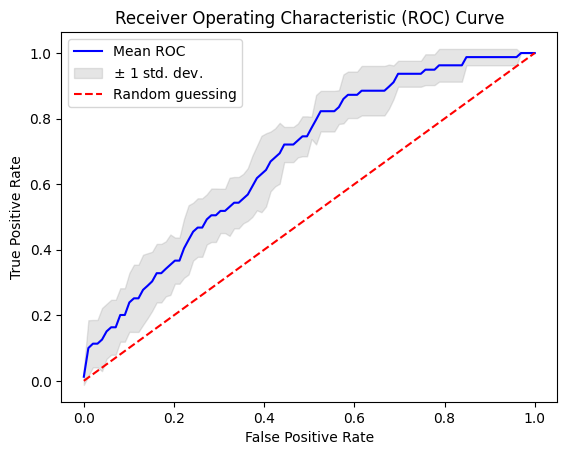

In [ ]:
# Compute the mean and standard deviation of the true positive rates over all folds
mean_tpr = np.nanmean(tpr_list, axis=0)
std_tpr = np.nanstd(tpr_list, axis=0)
# Print the mean and standard deviation of the AUROC scores over all folds
print('AUROC: {:.3f} +/- {:.3f}'.format(np.mean(aurocs), np.std(aurocs)))

# Plot the ROC curve with shaded regions indicating one standard deviation above and below the mean
plt.plot(mean_fpr, mean_tpr, color='blue', label='Mean ROC')
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='gray', alpha=0.2, label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**XAI**
---
* Model-agnostic methods

These methods can be applied to any machine learning model, regardless of its structure or type. They focus on analyzing the features’ input-output pair. This section will introduce and discuss LIME and SHAP, two widely-used surrogate models.

In [ ]:
!pip install shap

* **SHAP**

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


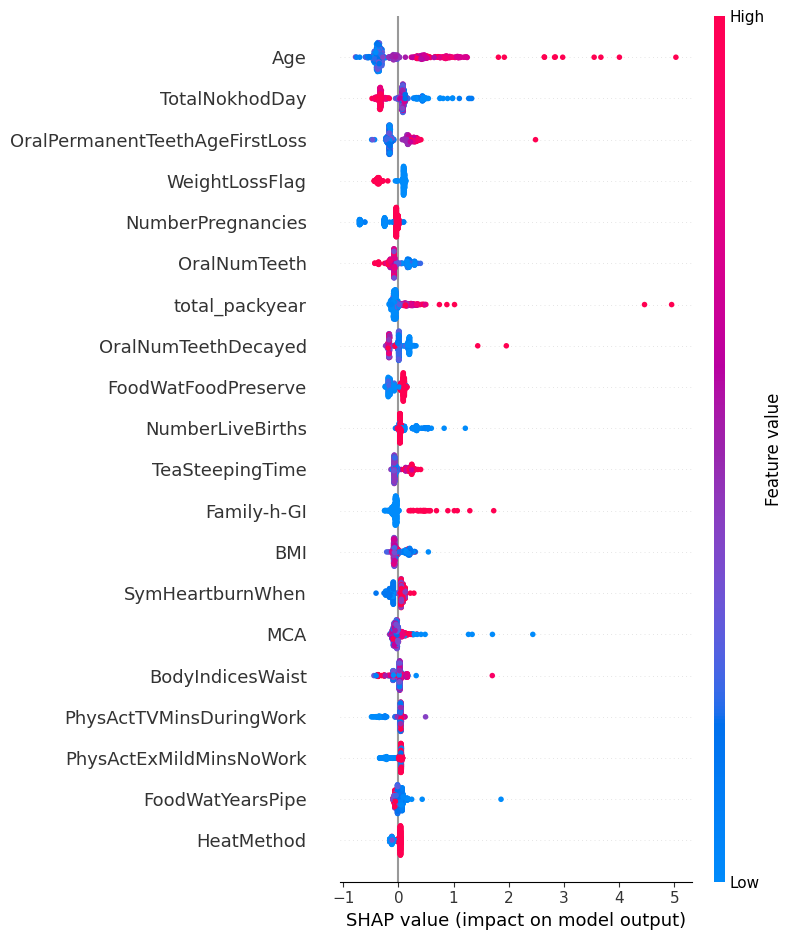

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

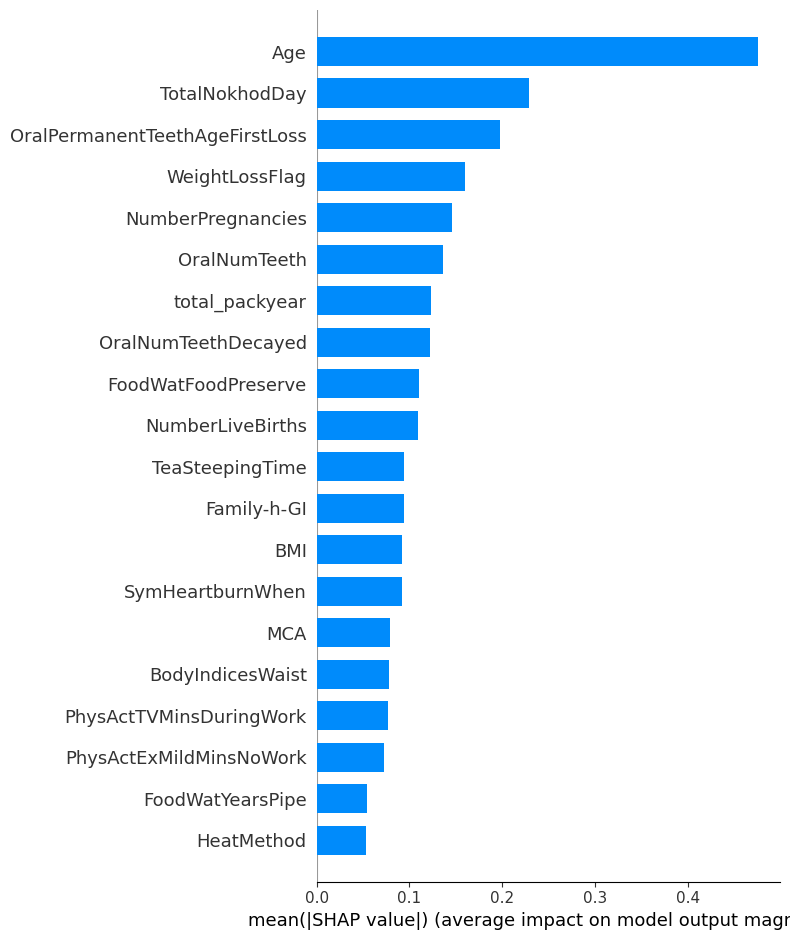

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Map feature importance values to column names
feature_importance = dict(zip(X_train.columns, shap_values))

* **LIME**



In [ ]:
!! pip install LIME

['Collecting LIME',
 '  Downloading lime-0.2.0.1.tar.gz (275 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/275.7 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━\x1b \x1b225.3/275.7 kB\x1b \x1b6.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b275.7/275.7 kB\x1b \x1b6.2 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25h  Preparing metadata (setup.py) ... \x1b[?25l\x1b[?25hdone',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from LIME) (3.7.1)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from LIME) (1.25.2)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from LIME) (1.11.4)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from LIME) (4.66.2)',
 'Requirement already satisfied: scikit-learn>=0.18 in

In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Unhealthy', 'Healthy']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

Tree-based (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       427
           1       0.07      0.33      0.11         3

    accuracy                           0.96       430
   macro avg       0.53      0.65      0.55       430
weighted avg       0.99      0.96      0.97       430



Model decision-making process - providing insights into the model's behavior and interpretability

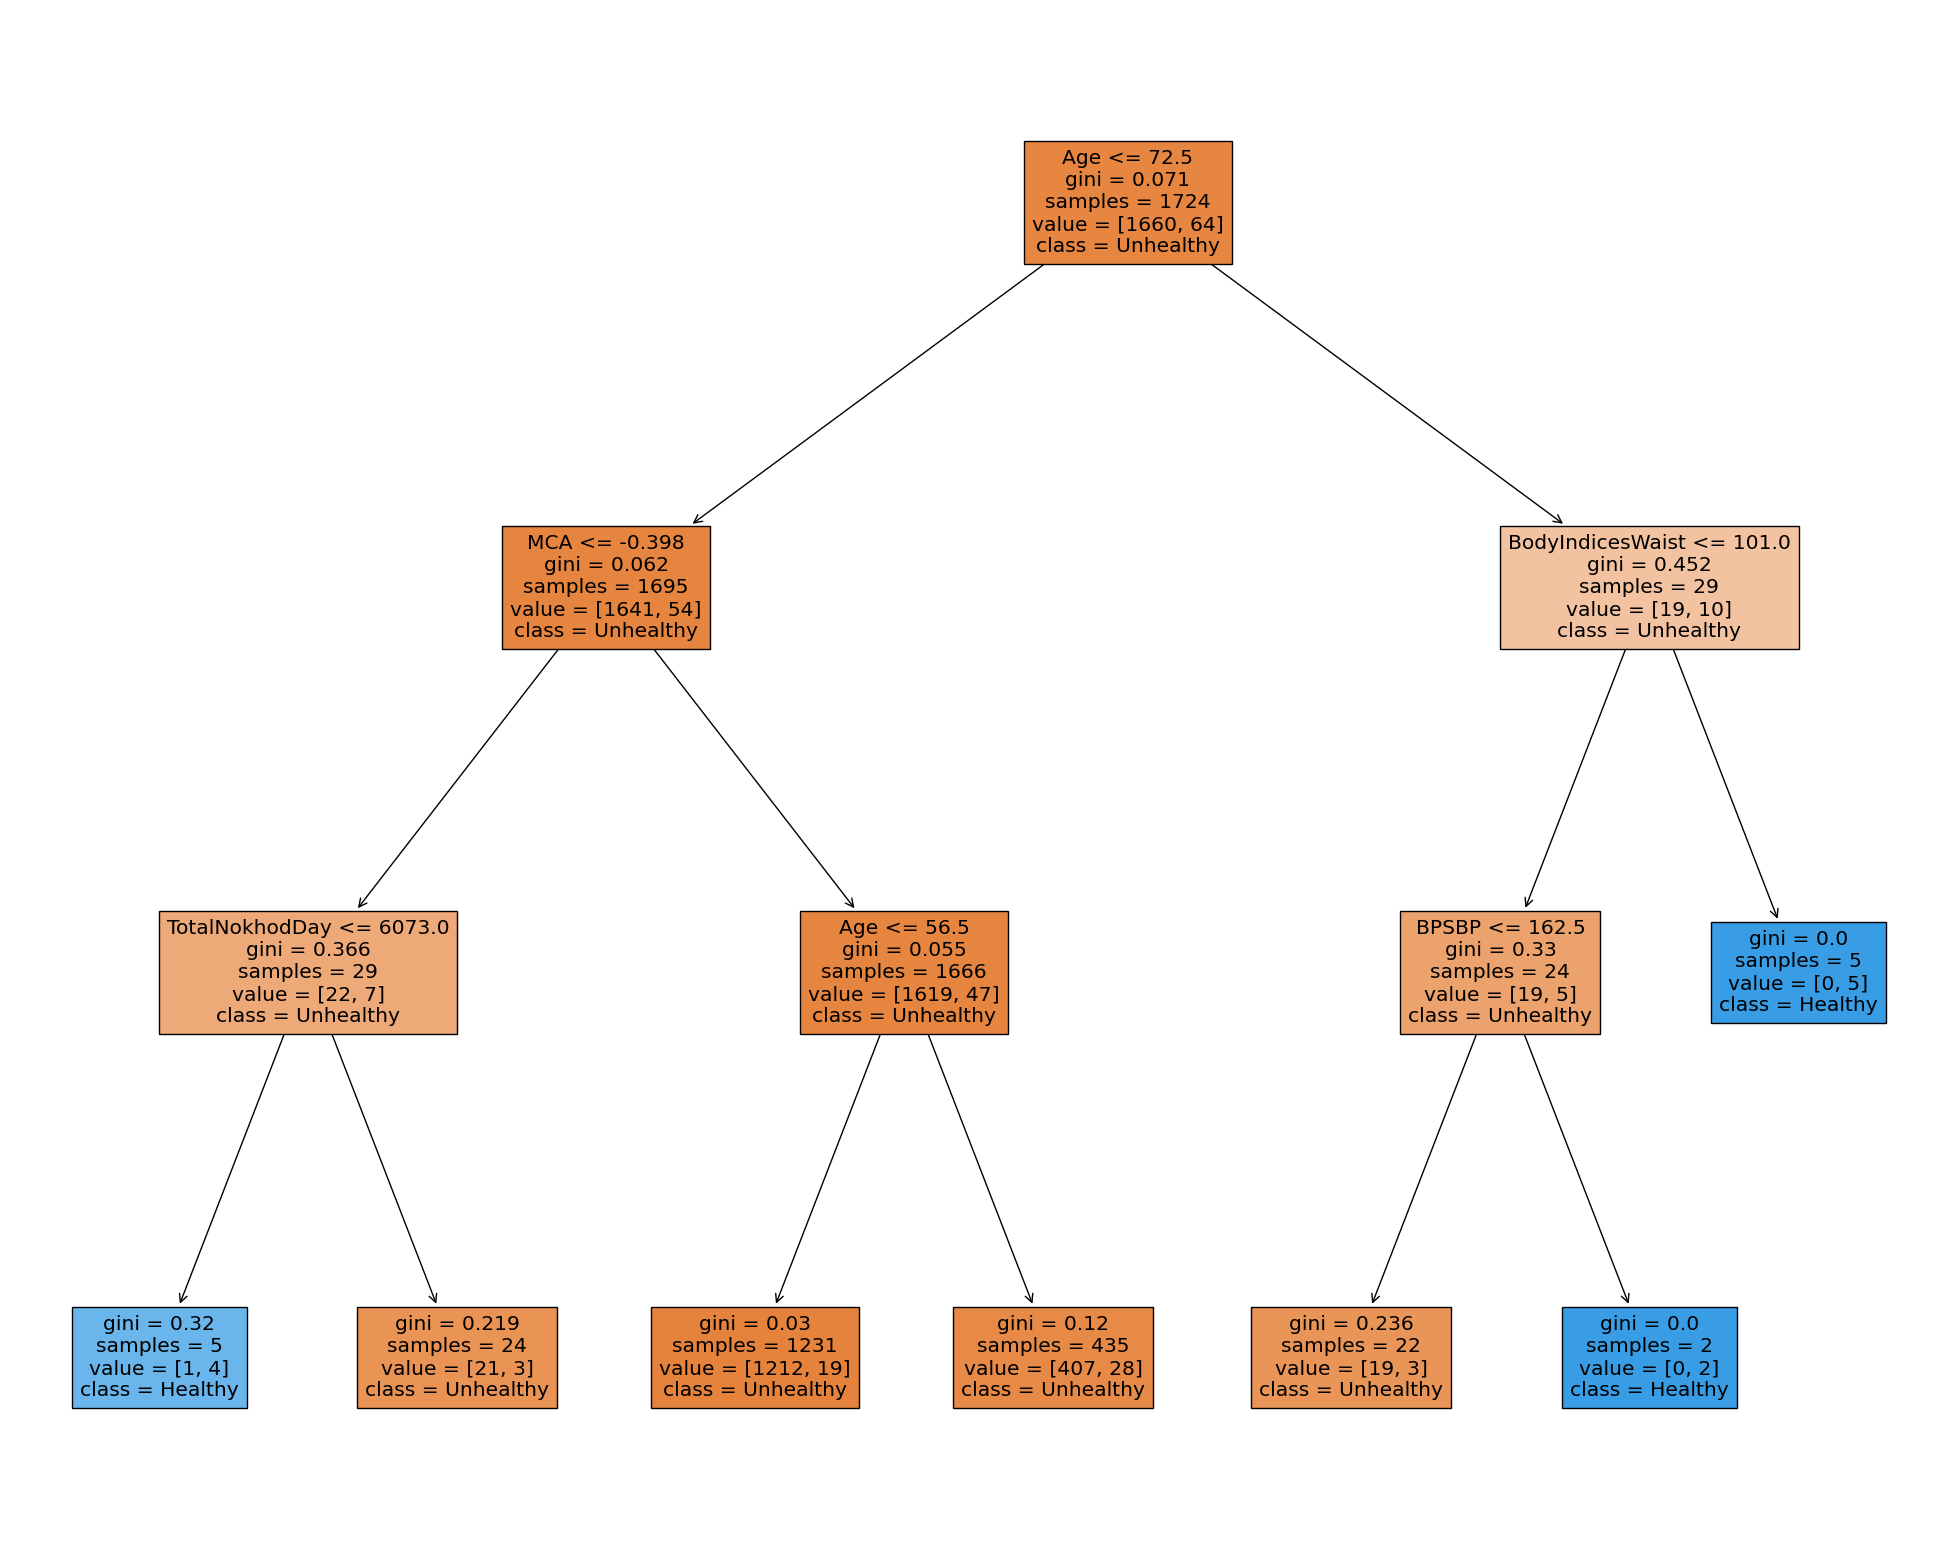

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)

In the above plot, each node represents a decision or split based on a specific feature value. For each internal node, the plot shows the feature used for the split, the split criterion value, the Gini impurity, and the number of samples reaching that node.

In the leaf nodes, the majority class and the number of samples are displayed. Also, the colors in the nodes represent the majority class, with the intensity of the color indicating the proportion of the dominant class within that node. For instance, the orange nodes on the left branch correspond to the label 1(Unhealthy), whereas the blue one corresponds to 0 (Healthy).



